<h1> Równania różniczkowe zwyczajne <h1>
<h3>Wprowadzenie do wszystkich zadań</h3>
    
* Zadanie polega na numerycznym rozwiązaniu  danego równania różniczkowego zwyczajnego.
* Należy napisać wlasną implementację metody Eulera 
* porównać ją z  metodą  Rungego-Kutty  (np. dostępną  w dowolnym pakiecie numerycznym - dla tych, co lubia Julię - polecam pakiet DifferentialEquations (https://diffeq.sciml.ai/stable/)) dla zadanego na zajęciach równania. 
* <b>Należy zbadać  stabilność  metod dla różnych wielkości kroków czasowych.</b>

<h3>Punkty:</h3>

* Rozwiązanie metodą Eulera (1pkt)
* Rozwiązanie metodą Rungego-Kutty (1 pkt)
* Porównanie stabilności (1 pkt)
* Ciekawa animacja poza standardowymi wykresami f(t) (1 pkt)
* Ewentualne rozszerzenie (extra 3 pkt)

<h3>Zad 1</h3>

Zasymuluj wahadlo matematyczne rozwiazując numerycznie 
rownanie różniczkowe je opisujace (rownież dla dużych wychyleń).
$$\frac{d^2x}{dt^2} + \frac{g}{l}\sin{x}=0 $$

Rozszerzenie: zasymuluj podwójne wahadlo:
https://www.myphysicslab.com/pendulum/double-pendulum-en.html

<h3>Zad 2</h3>

Zasymuluj układ grawitacyjny : gwiazda i przylatujace
cialo niebieskie z pewną (zadawana przez uzytkownika) prędkością 
poczatkową. 

http://www.artcompsci.org/msa/web/vol_1/v1_web/v1_web.html

Rozszerzenie: rozszerz symulację dla układu trzech ciał poruszających się w polu grawitacyjnym, 

* https://www.kwantowo.pl/2019/09/08/zagadka-ruchu-trzech-cial/

* https://arxiv.org/pdf/1508.02312.pdf

* https://www.wired.com/2016/06/way-solve-three-body-problem/

<h3>Zad3</h3>

Zasymuluj model drapieżnik - ofiara 

x(t)- populacja drapieżników

y(t) -populacja ofiar 

a - współczynnik śmierci drapieżników z powodu braku
ofiar 

b- współczynnik narodzin ofiar, gdy nie ma drapieżników

c- efektywność z jaką drapieżnik wykorzystuje 
energię pozyskaną ze zjedzenia
ofiar  $0.0<c=<1.0$ 

d- efektywność uśmiercania ofiar przez drapieżników

$$
\frac{dx}{dt}=
-a*x+c*d*x*y
$$
$$
\frac{dy}{dt}=
b*y-d*x*y
$$

Rozszerzenie:
Zasymulować wirtualne gatunki za pomocą automatu komórkowego:
* https://grimmel.github.io/posts/2020/10/blog-post-1/
* https://mathworld.wolfram.com/CellularAutomaton.html

<h3> Zad4</h3>

Zasymulować wahadlo magnetyczne. 
$$
\frac{d^2x}{dt^2} + k \frac{dx}{dt} - b(x-x^3)= a \sin{t} 
$$

Dodatkowy materiał znajduje sie w książce: 
Jacek Kudrewicz "Fraktale" (scan załączony osobno) . 

Rozszerzenie: Proszę narysować atraktor Duffinga - trajektorię $(x(t),y(t))$ na płaszczyźnie $(x,y)$ dla różnych wartości parametrów $a,b,k$. 


<h3>Zad 5</h3>

Proszę przeprowadzić symulację epidemii jako model SIR (równanie Kermacka-McKendricka (1927)) opisany układem równań różniczkowych:

$$\frac{dS}{dt}=−\beta SI$$
$$\frac{dI}{dt}=\beta SI−\gamma I$$
$$\frac{dR}{dt}=\gamma I$$
gdzie $\beta >0$ oznacza współczynnik (tempo) rozprzestrzeniania się infekcji,
$\gamma >0$ jest współczynnikiem zdrowienia osobników zainfekowanych.

Warunki początkowe:

S- osobniki podatne $S(0)> 0$

I- osobniki chorujące i roznoszące infekcję $I(0)>0$

R- osobniki ozdrowiałe $R(0)=0$.

Rozszerzenie: zaimplementować model epidemii jako automat komórkowy 
 * https://en.wikipedia.org/wiki/Epidemic_models_on_lattices
 * https://mathworld.wolfram.com/CellularAutomaton.html
 * https://grimmel.github.io/posts/2020/10/blog-post-1/


<h3>Zad6 (bez rozszerzeń-max 4 pkt)</h3>

Rozwiazać równanie różniczkowe dla rozpadu promieniotwórczego
$$\frac{du}{dt}+ \frac{u}{\tau}=0, u(0)=1$$
porownać z 
rozwiazaniem analitycznym 
$$u=e^{-\frac{t}{\tau}}$$
Zbadać stabilność metody Eulera gdy  $$\delta t \leq 2 \tau$$
oraz gdy $$\delta t > 2\tau$$

<h3>Zad7 (bez rozszerzeń-max 4 pkt)</h3>

Zasymulować drgania sprężyny wg równania:
$$m\frac{d^2x}{dt}=-kx $$



# Zad1


Zasymuluj wahadlo matematyczne rozwiazując numerycznie 
rownanie różniczkowe je opisujace (rownież dla dużych wychyleń).
$$\frac{d^2x}{dt^2} + \frac{g}{l}\sin{x}=0 $$

Rozszerzenie: zasymuluj podwójne wahadlo:
https://www.myphysicslab.com/pendulum/double-pendulum-en.html

Metoda Eulera:

In [10]:
import Pkg
Pkg.add("DifferentialEquations")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


    Fetching: [===================================>

Fetching: [========================================>]  100.0 %

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [50]:
using Plots
using DifferentialEquations
using DataFrames

┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1260
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatal

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

ERROR: LoadError: LoadError: UndefVarError: alg_difftype not defined
Stacktrace:
 [1] getproperty(::Module, ::Symbol) at ./Base.jl:26
 [2] top-level scope at /home/daniel/.julia/packages/StochasticDiffEq/BKyQ3/src/alg_utils.jl:259
 [3] include(::Module, ::String) at ./Base.jl:377
 [4] include(::String) at /home/daniel/.julia/packages/StochasticDiffEq/BKyQ3/sr

ErrorException: [91mFailed to precompile DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa] to /home/daniel/.julia/compiled/v1.4/DifferentialEquations/UQdwS_ysKWV.ji.[39m

In [41]:
g= 9.81
l = 2.0
x0 = 0.8 * l
v0 = 0.0
t_range = (0.0, 5.0)

(0.0, 5.0)

In [45]:
function euler(x0, v0, g, l, t_range, dt=0.005)
    n = Int((t_range[2] - t_range[1]) / dt)
    t = [i*dt + t_range[1] for i in 0:n]
    x = zeros(n+1)
    v = zeros(n+1)
    dx = 0
    dv = 0
    x[1] = x0
    v[1] = v0
    for i ∈ 1:n
        h = t[i+1] - t[i]
        dx = v[i]
        dv = -g / l * sin(x[i])
        x[i+1] = x[i] + h * dx
        v[i+1] = v[i] + h * dv
    end
    return [t, x, v]
end

euler (generic function with 2 methods)

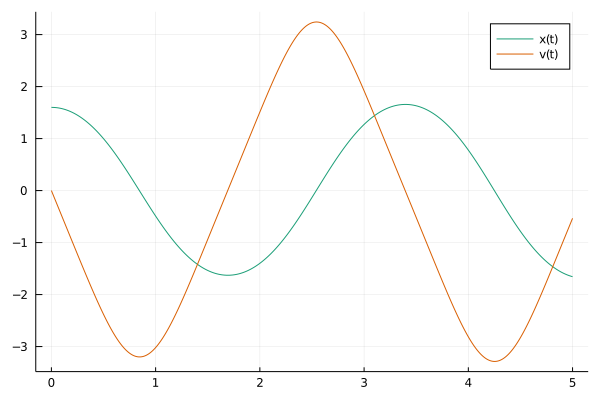

In [59]:
t,x,v = euler(x0,v0,g,l,tspan)
plot(t,[x, v],labels=["x(t)" "v(t)"], palette = :Dark2_5)

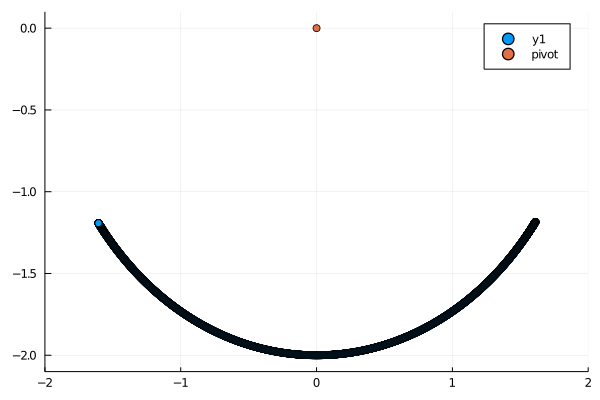

In [47]:
y = [-sqrt(max(0, l^2 - x^2)) for x in res[2]]
plot()
scatter!(res[2],y,ylim=(-2.1,0.1),xlim=(-2,2))
scatter!((0,0),label="pivot")

Metoda Rungeg-Kutty:

In [49]:
function singlependulum!(du,u,p,t)
    g,l = p
    du[1] = u[2]
    du[2] = -g / l * sin(u[1])
end

p = (g,l)
prob = ODEProblem(singlependulum!,u0,tspan,p)
sol = solve(prob,Tsit5(),dt=0.001,adaptive=false)

plot(sol,labels=["x(t)" "v(t)"])

UndefVarError: [91mUndefVarError: ODEProblem not defined[39m